In [40]:
import numpy as np
import pandas as pd
from pair_trading_foundations.utils import examine_output_data
import pickle

## Load the generated file (Feature + Label + Metadata Combined)

In [74]:
with open('Data/spotcheckout_output.pkl','rb') as file:
    sample_output = pickle.load(file)

In [58]:
sample_output[['Ticker_P1','Ticker_P2']].drop_duplicates().shape

(45, 2)

In [77]:
temp=sample_output[sample_output.pnls.notnull()]
temp.shape

(28800, 21)

In [70]:
tb = sample_output.drop('trade_executions', axis=1).dropna().reset_index(drop=True)
tb

,Date,Ticker_P1,Close_P1,Ticker_P2,Close_P2,abs_spread,abs_spread_mean,abs_spread_std,abs_spread_mean_l28,abs_spread_std_l28,spread_normed,abs_spread_normed_max,abs_spread_normed_90th,abs_spread_normed_75th,abs_spread_normed_median,abs_spread_normed_l7_avg,abs_spread_normed_l14_avg,cos_sim,corr_coef,pnls
0,2022-12-15,ADI,162.986176,AVB,160.979385,2.006790,39.300798,21.079114,3.312043,2.455309,-1.769240,2.847355,1.950965,1.612494,0.620789,1.665443,1.733521,0.994037,0.575727,0.000000
1,2022-12-16,ADI,163.702530,AVB,157.364746,6.337784,39.302718,21.076061,3.216124,2.269337,-1.564094,2.847355,1.946776,1.596394,0.620789,1.639861,1.709306,0.994002,0.568851,0.000000
2,2022-12-19,ADI,162.053925,AVB,154.713394,7.340530,39.307933,21.067811,3.262677,2.341569,-1.517358,2.847355,1.941995,1.582521,0.620789,1.621486,1.691511,0.993965,0.561913,0.000000
3,2022-12-20,ADI,161.259064,AVB,153.750153,7.508911,39.314025,21.058153,3.287707,2.384228,-1.510347,2.847355,1.939214,1.576355,0.620789,1.596014,1.668067,0.993929,0.555377,0.000000
4,2022-12-21,ADI,164.281509,AVB,154.856461,9.425049,39.319707,21.049686,3.367403,2.551078,-1.420195,2.847355,1.934490,1.570115,0.620789,1.568945,1.639517,0.993884,0.547944,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,2023-07-06,WMT,155.974167,ZBH,140.613541,15.360626,16.408672,7.802802,14.958214,3.648805,-0.134317,2.295204,1.351944,1.014429,0.629473,0.544393,0.593113,0.996646,0.574217,-0.014463
6386,2023-07-07,WMT,152.380341,ZBH,140.274979,12.105362,16.398206,7.805062,14.746071,3.635321,-0.550008,2.295204,1.351944,1.014429,0.629473,0.488765,0.615718,0.996710,0.581156,-0.009723
6387,2023-07-10,WMT,153.760284,ZBH,141.918106,11.842178,16.393413,7.807126,14.509984,3.600173,-0.582959,2.295204,1.351944,1.014429,0.629473,0.468310,0.607111,0.996762,0.587508,-0.015901
6388,2023-07-11,WMT,153.531952,ZBH,142.585327,10.946625,16.391477,7.808359,14.211358,3.533605,-0.697311,2.295204,1.351944,1.014429,0.633677,0.424652,0.598468,0.996805,0.593121,-0.008242


In [71]:
6390/45

142.0

In [73]:
1259-500-120

639

In [72]:
260-142

118

## Sampling any pnl that is not 0 and examine

In [59]:
34200/45

760.0

In [62]:
56655/45

1259.0

In [64]:
34200/45

760.0

In [66]:
11745/45

261.0

In [65]:
1259-500

759

In [68]:
28800/45

640.0

In [69]:
1259-500-120

639

In [47]:
sample_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       56655 non-null  object 
 1   Ticker_P1                  56655 non-null  object 
 2   Close_P1                   56655 non-null  float64
 3   Ticker_P2                  56655 non-null  object 
 4   Close_P2                   56655 non-null  float64
 5   abs_spread                 56655 non-null  float64
 6   abs_spread_mean            34200 non-null  float64
 7   abs_spread_std             34200 non-null  float64
 8   abs_spread_mean_l28        55440 non-null  float64
 9   abs_spread_std_l28         55440 non-null  float64
 10  spread_normed              34200 non-null  float64
 11  abs_spread_normed_max      11745 non-null  float64
 12  abs_spread_normed_90th     11745 non-null  float64
 13  abs_spread_normed_75th     11745 non-null  flo

In [50]:
# sample 
sampled_record = sample_output[sample_output.pnls>0].sample(1)
sampled_record

,Date,Ticker_P1,Close_P1,Ticker_P2,Close_P2,abs_spread,abs_spread_mean,abs_spread_std,abs_spread_mean_l28,abs_spread_std_l28,spread_normed,abs_spread_normed_max,abs_spread_normed_90th,abs_spread_normed_75th,abs_spread_normed_median,abs_spread_normed_l7_avg,abs_spread_normed_l14_avg,cos_sim,corr_coef,pnls,trade_executions
2333,2023-04-06,ADI,184.527039,EIX,70.207726,114.319313,101.321351,11.270611,119.00951,3.121196,1.153262,2.730629,1.936447,1.622978,0.985814,1.828521,1.754201,0.995464,0.370424,0.010193,exit_idx entry_idx stock1_price_entry .....


## Visualize the data

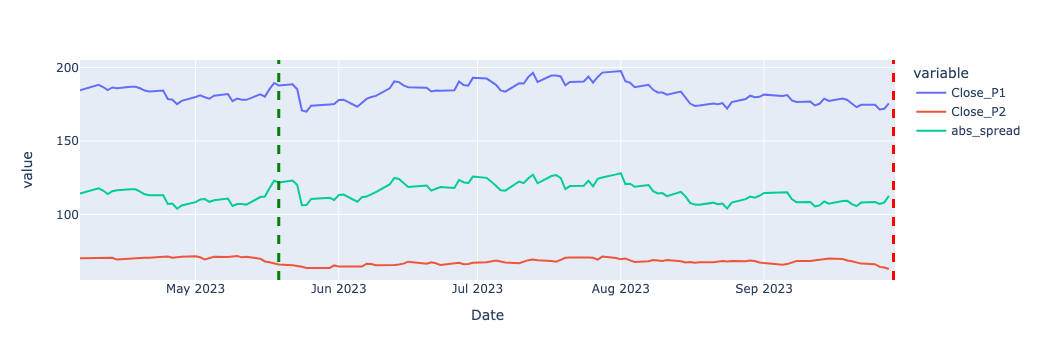

In [51]:
examine_output_data(
    tb=sample_output,
    ticker1=sampled_record.Ticker_P1.values[0],
    ticker2=sampled_record.Ticker_P2.values[0],
    date=sampled_record.Date.values[0]
)

In [52]:
## Display the trade execution details

In [53]:
sampled_record.trade_executions.values[0]

,exit_idx,entry_idx,stock1_price_entry,stock1_price_exit,stock2_price_entry,stock2_price_exit,long_stock_1,pnl,entry_dates,exit_dates
0,120,29,187.8396,174.268875,66.027771,62.6035,False,1.019264,2023-05-19,2023-09-29
